# Per period metrics

# Before preprocessing

In [1]:
!pwd

/Users/furiosa/Documents/repos/paper_greekparliament/src


In [2]:
import pandas as pd
import datetime
import nltk
import unicodedata
import matplotlib.pyplot as plt
import re
from numerize import numerize 

print('Reading file...')
df = pd.read_csv('../out_files/tell_all_corrected.csv')#, nrows=100000
df = df[df['speech'].notna()]

print(df.tail(2))

Reading file...
                                     member_name sitting_date  \
1280916                                      NaN   24/07/2020   
1280917  κωνσταντινοπουλος κωνσταντινου οδυσσεας   24/07/2020   

        parliamentary_period parliamentary_session parliamentary_sitting  \
1280916   period 18 review 9             session 1           sitting 187   
1280917   period 18 review 9             session 1           sitting 187   

        political_party                                     government  \
1280916           βουλη  ['μητσοτακη κυριακου(08/07/2019-28/07/2020)']   
1280917  κινημα αλλαγης  ['μητσοτακη κυριακου(08/07/2019-28/07/2020)']   

        member_region                                             roles  \
1280916           NaN                                               NaN   
1280917      αρκαδιας  ['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)']   

        member_gender  speaker_info  \
1280916           NaN  βουλευτης/ες   
1280917          male    προεδρε

In [3]:
print(df.speech.iloc[0])

 Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να συνοδεύσει το Μακαριότατο Αρχιεπίσκοπο Αθηνών και πάσης Ελλάδος κ. ΣΕΡΑΦΕΙΜ και τα συνοδεύοντα αυτόν μέλη της Ιεράς Συνόδου κατά την είσοδό τους στην Αίθουσα της Βουλής, προκειμένου να τελεσθεί αγιασμός.  . Στη συνέχεια τελείται ο καθιερωμένος αγιασμός.


In [4]:
from tqdm import tqdm
tqdm.pandas()

df = df.rename(columns={'parliamentary_period': 'period'})

df.period = df.period.apply(lambda x: x.replace(' review 9',''))
df.period = df.period.apply(lambda x: x.replace('period ',''))

df.period = df.period.astype(int)

print(datetime.datetime.now())

#Group speeches by period
PERperiod_df_original = df.groupby(df.period)['speech'].progress_apply(' '.join).reset_index()

print(datetime.datetime.now())

/Users/furiosa/Documents/repos/paper_greekparliament/.parl_env/lib/python3.7/site-packages/tqdm/std.py:670: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
  0%|          | 0/14 [00:00<?, ?it/s]

2021-07-11 16:44:38.487696


100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

2021-07-11 16:44:47.133961


In [5]:
# print(PERperiod_df_original.speech.iloc[0])
print(PERperiod_df_original.columns)

Index(['period', 'speech'], dtype='object')


In [6]:
PERperiod_df_original["size_chars"] = PERperiod_df_original.speech.progress_apply(len)
PERperiod_df_original["size_tokens"] = PERperiod_df_original.speech.progress_apply(lambda x: len(nltk.word_tokenize(x.lower())))
PERperiod_df_original["size_unique_tokens"] = PERperiod_df_original.speech.progress_apply(lambda x: len(set(nltk.word_tokenize(x.lower()))))
PERperiod_df_original["size_sent"] = PERperiod_df_original.speech.progress_apply(lambda x: len(nltk.sent_tokenize(x)))
PERperiod_df_original["size_unique_sent"] = PERperiod_df_original.speech.progress_apply(lambda x: len(set(nltk.sent_tokenize(x.lower()))))

100%|██████████| 14/14 [11:53<00:00, 50.97s/it]


In [7]:
def periods_to_dates(periods):

    period_dict = {5:'7/1989-10/1989',
                  6:'11/1989-3/1990',
                  7:'4/1990-9/1993',
                  8:'10/1993-8/1996',
                  9:'10/1996-3/2000',
                  10:'4/2000-2/2004',
                  11:'3/2004-8/2007',
                  12:'9/2007-9/2009',
                  13:'10/2009-4/2012',
                  14:'5/2012-5/2012', 
                  15:'6/2012-12/2014', 
                  16:'2/2015-8/2015',
                  17:'10/2015-6/2019', 
                  18:'7/2019-7/2020'}
    
    if isinstance(periods, list):
        out = period_dict[periods[0]]+' & '+period_dict[periods[1]]
        return out 
    else:
        return 'Period '+str(periods)+'\n'+period_dict[periods]        

def step_one_pairs(list_of_items):
    return [(list_of_items[i],list_of_items[i+1]) for i in range(len(list_of_items)-1)]


In [13]:
print(PERperiod_df_original)

    period                                             speech  size_chars  \
0        5   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...     7925606   
1        6   Κύριοι Βουλευτές, κηρύσσουμε την έναρξη της π...     7002039   
2        7   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...   141113546   
3        8   Μάλιστα, μάλιστα. Μάλιστα, μάλιστα.  Κυρίες κ...    35329492   
4        9   Παρακαλείται ο προσωρινός Γραμματέας κ. Δημήτ...   124360957   
5       10  Τέλος, επιστολή της Βουλευτού Α' Περιφέρειας Θ...   127747031   
6       11   Κυρίες και κύριοι Βουλευτές, κηρύσσεται η ένα...   142300456   
7       12   Κυρίες και κύριοι Βουλευτές, κηρύσσεται η ένα...    96399653   
8       13   Κυρίες και κύριοι Βουλευτές, κηρύσσεται η ένα...   139607286   
9       14   Κυρίες και κύριοι Βουλευτές, συγκαλείται η Βο...       24265   
10      15   Κυρίες και κύριοι Βουλευτές, συγκαλείται η Βο...   111426767   
11      16   Κυρίες και κύριοι Βουλευτές, συγκαλείται η Βο...    19273791   

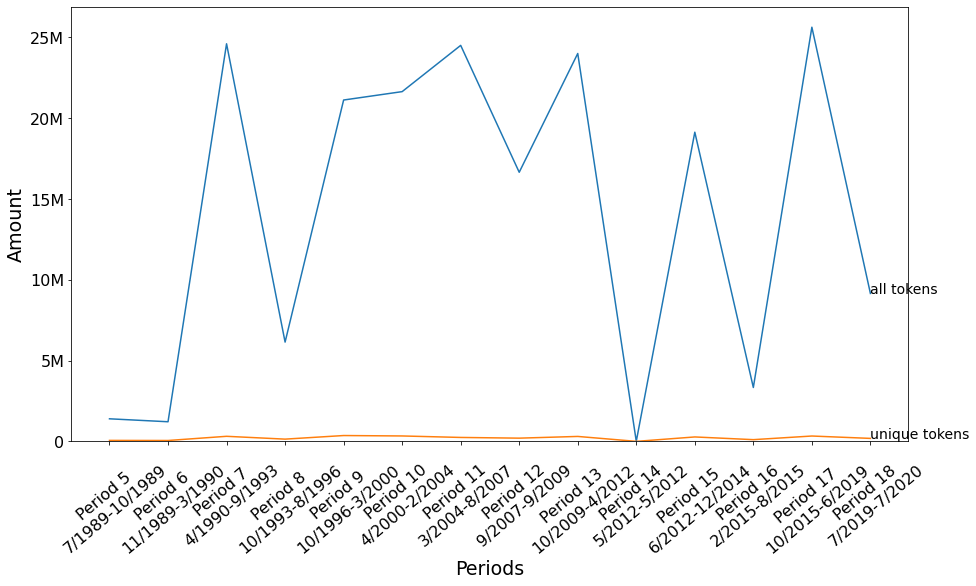

In [24]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15, 8))
plt.ticklabel_format(style = 'plain')


periods = PERperiod_df_original.period.to_list()

# plt.plot(PERperiod_df_original.period,PERperiod_df_original.size_chars)
# plt.annotate(text='characters', xy=(periods[-1],PERperiod_df_original.size_chars.to_list()[-1]), size=14)

plt.plot(PERperiod_df_original.period,PERperiod_df_original.size_tokens)
plt.annotate(text='all tokens', xy=(periods[-1],PERperiod_df_original.size_tokens.to_list()[-1]), size=14)

plt.plot(PERperiod_df_original.period,PERperiod_df_original.size_unique_tokens)
plt.annotate(text='unique tokens', xy=(periods[-1],PERperiod_df_original.size_unique_tokens.to_list()[-1]), size=14)

# plt.plot(PERperiod_df_original.period,PERperiod_df_original.size_sent)
# plt.annotate(text='sentences', xy=(periods[-1],PERperiod_df_original.size_sent.to_list()[-1]), size=14)

# plt.plot(PERperiod_df_original.period,PERperiod_df_original.size_unique_sent)
# plt.annotate(text='unique sentences', xy=(periods[-1],PERperiod_df_original.size_unique_sent.to_list()[-1]), size=14)


x_labels = [periods_to_dates(period) for period in periods]    
plt.xticks(periods,x_labels, rotation=40)

ax = plt.gca()
formatter = FuncFormatter(numerize.numerize)
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
# ax.legend(['characters','tokens', 'unique tokens', 'sentences', 'unique sentences'], loc='upper left',prop={'size': 14})

plt.ylabel('Amount')
plt.xlabel('Periods')
plt.gca().set_ylim(bottom=0)
plt.rcParams['axes.labelsize'] = 19

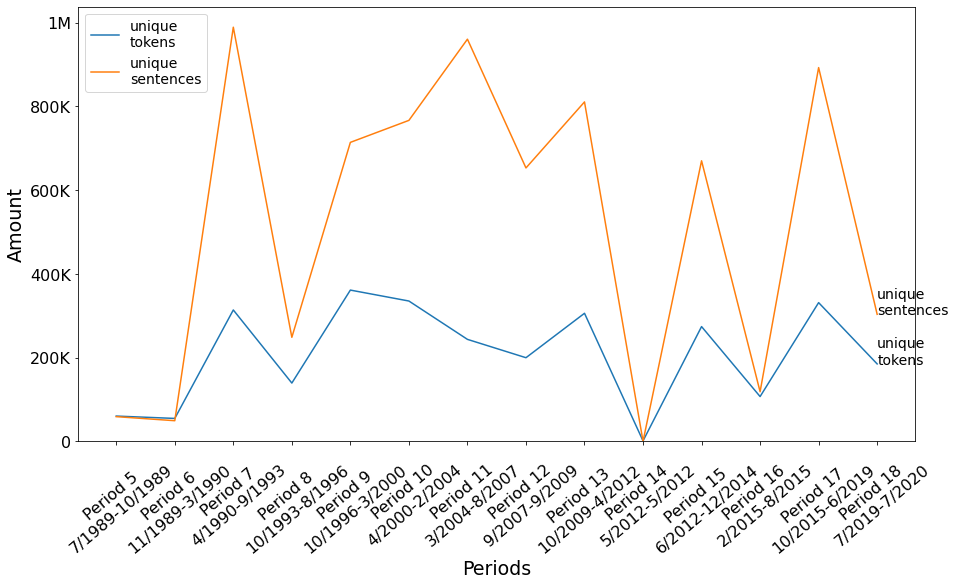

In [9]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15, 8))
plt.ticklabel_format(style = 'plain')

periods = PERperiod_df_original.period.to_list()

plt.plot(PERperiod_df_original.period,PERperiod_df_original.size_unique_tokens)
plt.annotate(text='unique\ntokens', xy=(periods[-1],PERperiod_df_original.size_unique_tokens.to_list()[-1]), size=14)

# plt.plot(PERperiod_df_original.period,PERperiod_df_original.size_sent)
# plt.annotate(text='sentences', xy=(periods[-1],PERperiod_df_original.size_sent.to_list()[-1]), size=14)

plt.plot(PERperiod_df_original.period,PERperiod_df_original.size_unique_sent)
plt.annotate(text='unique\nsentences', xy=(periods[-1],PERperiod_df_original.size_unique_sent.to_list()[-1]), size=14)

x_labels = [periods_to_dates(period) for period in periods]    
plt.xticks(periods,x_labels, rotation=40)

ax = plt.gca()
formatter = FuncFormatter(numerize.numerize)
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.legend(['unique\ntokens', 'unique\nsentences'], loc='upper left',prop={'size': 14})

plt.ylabel('Amount')
plt.xlabel('Periods')
plt.gca().set_ylim(bottom=0)
plt.rcParams['axes.labelsize'] = 19

### Common vocabulary size per period

In [20]:
# Sort periods based on number in the string

periods = sorted(PERperiod_df_original.period.to_list())
period_pairs = step_one_pairs(periods)
print(period_pairs)

[(5, 6), (6, 7)]


In [21]:
PERperiod_df_original['vocab'] = PERperiod_df_original.speech.progress_apply(lambda x: nltk.word_tokenize(x.lower()))

100%|██████████| 3/3 [02:16<00:00, 45.53s/it]


In order to compute the commmon vocabulary between each consecutive pair of parliamentary periods, we tokenized the text of each period into a list of words and computed the intersection between each two lists. 

In [22]:
common_vocab = []

for pair in period_pairs:
    
    s1 = set(PERperiod_df_original.loc[(PERperiod_df_original.period==pair[0])].vocab.values[0])
    s2 = set(PERperiod_df_original.loc[(PERperiod_df_original.period==pair[1])].vocab.values[0])
    common_voc = len(s1.intersection(s2))
    common_vocab.append([pair, common_voc])
    
common_vocab_original = pd.DataFrame(common_vocab, columns = ['pair', 'common_vocab'])
print(common_vocab_original.head(2))

     pair  common_vocab
0  (5, 6)         30043
1  (6, 7)         44311


[5, 6, 7]
[(5, 6), (6, 7)]
[5.5, 6.5]


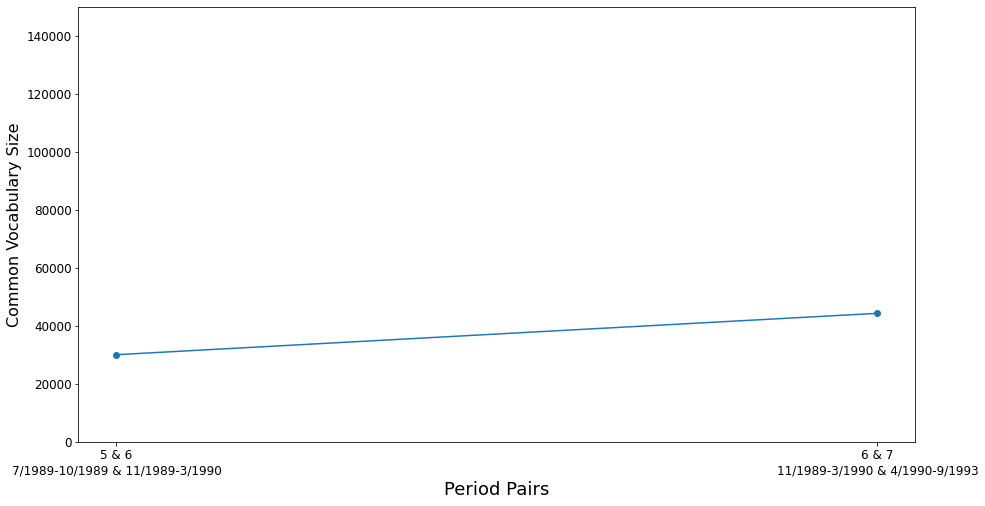

<Figure size 432x288 with 0 Axes>

In [166]:
from matplotlib.font_manager import FontProperties
import random
import matplotlib.pyplot as plt
import seaborn as sns


periods = sorted(PERperiod_df_original.period.to_list())
print(periods)

period_pairs = step_one_pairs(periods)
print(period_pairs)

fig = plt.figure(figsize=(15, 8))
colors = sns.color_palette("hls", 90) #90 is available pairs

plt.rcParams.update({'font.size': 12})

X = common_vocab_original.pair.to_list()
Y = common_vocab_original.common_vocab.to_list()
X = [i+0.5 for i in range(periods[0], periods[-1])]
print(X)
plt.scatter(X,Y)

plt.plot(X,Y)
plt.xticks([i+0.5 for i in range(periods[0], periods[-1])], [
    (str(i)+' & '+str(i+1)+'\n'+periods_to_dates([i,i+1])) for i in range(periods[0], periods[-1])])

plt.xlabel('Period Pairs', fontsize=18)
plt.ylabel('Common Vocabulary Size', fontsize=16)

ax = plt.gca()
ax.set_ylim([0,150000])
handles, labels = ax.get_legend_handles_labels()
plt.savefig('../out_files/common_periodic_vocab_before.png', dpi=200,  bbox_inches='tight')

plt.show()
plt.cla()
plt.clf()
fig.clear()
plt.close(fig)


# After preprocessing

In [28]:
import pandas as pd
import datetime
import nltk
import unicodedata
import matplotlib.pyplot as plt
print('Reading file...')
df_cleaned = pd.read_csv('../out_files/tell_all_cleaned.csv') #, nrows=100000
df_cleaned = df_cleaned[df_cleaned['speech'].notna()]

print(df_cleaned.head(2))

Reading file...
                    member_name sitting_date parliamentary_period  \
0  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
1  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   

  parliamentary_session parliamentary_sitting                 political_party  \
0             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
1             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   

                                     government member_region  \
0  ['τζαννετακη τζαννη(02/07/1989-12/10/1989)']   β' πειραιως   
1  ['τζαννετακη τζαννη(02/07/1989-12/10/1989)']   β' πειραιως   

                                              roles member_gender  \
0  ['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)']          male   
1  ['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)']          male   

  speaker_info                                             speech  
0   προεδρευων  παρακαλειται @sw γραμματεας βουλγαρακης @sw 

In [266]:
test = df_cleaned.speech.iloc[0]
print(test)
print(nltk.word_tokenize(test))
print('------')
print(nltk.sent_tokenize(test))

παρακαλειται @sw γραμματεας βουλγαρακης @sw συνοδευσει @sw μακαριοτατο αρχιεπισκοπο αθηνων @sw πασης ελλαδος σεραφειμ @sw @sw συνοδευοντα @sw μελη @sw ιερας συνοδου @sw @sw εισοδο @sw @sw αιθουσα @sw βουλης @sw @sw τελεσθει αγιασμος.@sw συνεχεια τελειται @sw καθιερωμενος αγιασμος
['παρακαλειται', '@', 'sw', 'γραμματεας', 'βουλγαρακης', '@', 'sw', 'συνοδευσει', '@', 'sw', 'μακαριοτατο', 'αρχιεπισκοπο', 'αθηνων', '@', 'sw', 'πασης', 'ελλαδος', 'σεραφειμ', '@', 'sw', '@', 'sw', 'συνοδευοντα', '@', 'sw', 'μελη', '@', 'sw', 'ιερας', 'συνοδου', '@', 'sw', '@', 'sw', 'εισοδο', '@', 'sw', '@', 'sw', 'αιθουσα', '@', 'sw', 'βουλης', '@', 'sw', '@', 'sw', 'τελεσθει', 'αγιασμος', '.', '@', 'sw', 'συνεχεια', 'τελειται', '@', 'sw', 'καθιερωμενος', 'αγιασμος']
------
['παρακαλειται @sw γραμματεας βουλγαρακης @sw συνοδευσει @sw μακαριοτατο αρχιεπισκοπο αθηνων @sw πασης ελλαδος σεραφειμ @sw @sw συνοδευοντα @sw μελη @sw ιερας συνοδου @sw @sw εισοδο @sw @sw αιθουσα @sw βουλης @sw @sw τελεσθει αγιασμος.',

In [30]:
df_cleaned = df_cleaned.rename(columns={'parliamentary_period': 'period'})

df_cleaned.period = df_cleaned.period.apply(lambda x: x.replace(' review 9',''))
df_cleaned.period = df_cleaned.period.apply(lambda x: x.replace('period ',''))

df_cleaned.period = df_cleaned.period.astype(int)

print(datetime.datetime.now())
#Group speeches by year

PERperiod_df_cleaned = df_cleaned.groupby(df_cleaned.period)['speech'].progress_apply('. '.join).reset_index() #concat sentences, each last sentence for each speech did not have dot so add one.

print(datetime.datetime.now())

  0%|          | 0/3 [00:00<?, ?it/s]

2021-06-16 17:51:11.317135


100%|██████████| 3/3 [00:00<00:00, 16.35it/s]

2021-06-16 17:51:11.511125


In [31]:
# print(PERperiod_df_cleaned.speech.iloc[0])
print(PERperiod_df_cleaned.columns)

Index(['period', 'speech'], dtype='object')


In [32]:
PERperiod_df_cleaned["size_chars"] = PERperiod_df_cleaned.speech.progress_apply(len)
PERperiod_df_cleaned["size_tokens"] = PERperiod_df_cleaned.speech.progress_apply(lambda x: len(nltk.word_tokenize(x)))
PERperiod_df_cleaned["size_unique_tokens"] = PERperiod_df_cleaned.speech.progress_apply(lambda x: len(set(nltk.word_tokenize(x))))
PERperiod_df_cleaned["size_sent"] = PERperiod_df_cleaned.speech.progress_apply(lambda x: len(nltk.sent_tokenize(x)))
PERperiod_df_cleaned["size_unique_sent"] = PERperiod_df_cleaned.speech.progress_apply(lambda x: len(set(nltk.sent_tokenize(x))))


100%|██████████| 3/3 [00:25<00:00,  8.65s/it]


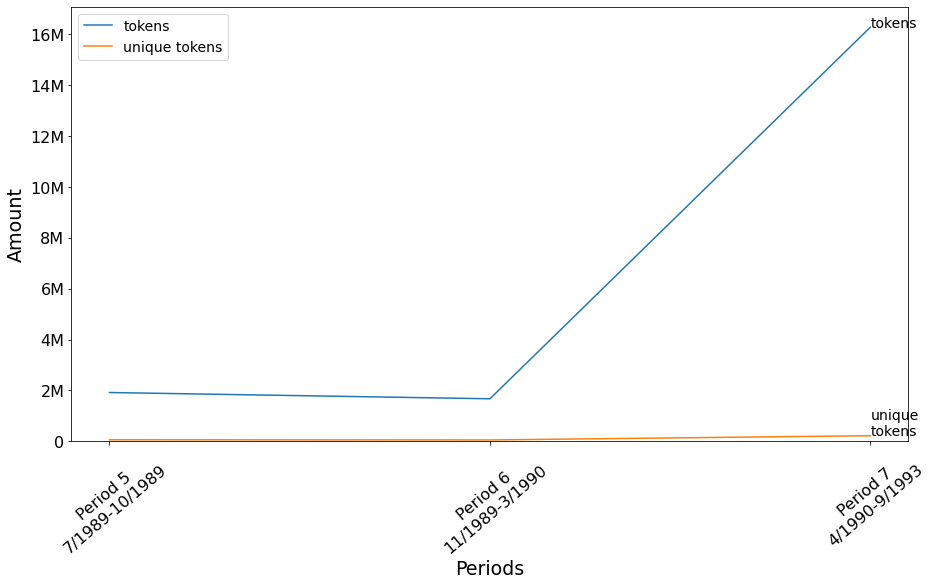

In [264]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15, 8))
plt.ticklabel_format(style = 'plain')


periods = PERperiod_df_cleaned.period.to_list()

# plt.plot(PERperiod_df_cleaned.period,PERperiod_df_cleaned.size_chars)
# plt.annotate(text='characters', xy=(periods[-1],PERperiod_df_cleaned.size_chars.to_list()[-1]), size=14)

plt.plot(PERperiod_df_cleaned.period,PERperiod_df_cleaned.size_tokens)
plt.annotate(text='tokens', xy=(periods[-1],PERperiod_df_cleaned.size_tokens.to_list()[-1]), size=14)

plt.plot(PERperiod_df_cleaned.period,PERperiod_df_cleaned.size_unique_tokens)
plt.annotate(text='unique\ntokens', xy=(periods[-1],PERperiod_df_cleaned.size_unique_tokens.to_list()[-1]), size=14)

x_labels = [periods_to_dates(period) for period in periods]    
plt.xticks(periods,x_labels, rotation=40)

ax = plt.gca()
formatter = FuncFormatter(numerize.numerize)
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.legend(['tokens', 'unique tokens'], loc='upper left',prop={'size': 14})

plt.ylabel('Amount')
plt.xlabel('Periods')
plt.gca().set_ylim(bottom=0)
plt.rcParams['axes.labelsize'] = 19

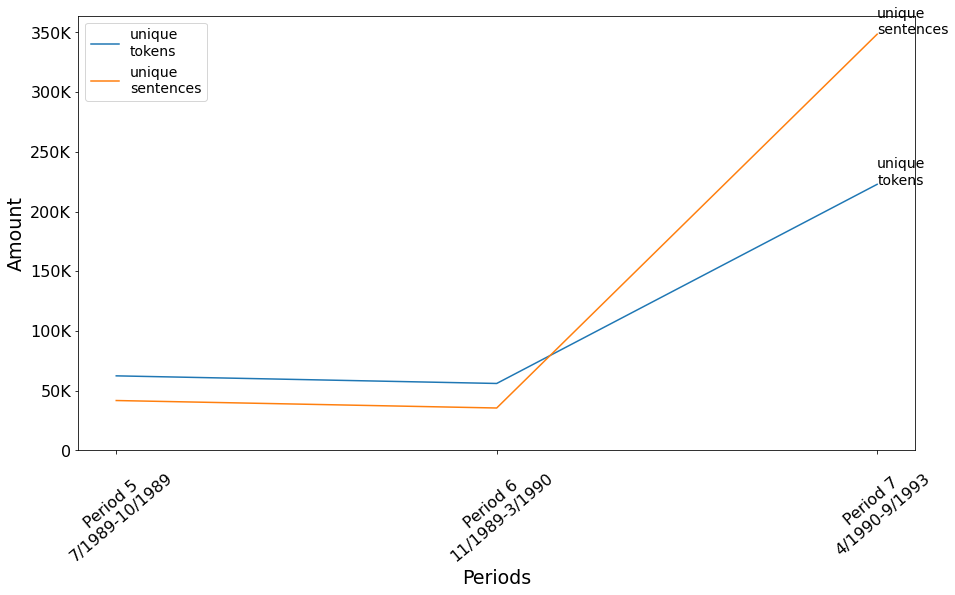

In [265]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15, 8))
plt.ticklabel_format(style = 'plain')

periods = PERperiod_df_cleaned.period.to_list()

plt.plot(PERperiod_df_cleaned.period,PERperiod_df_cleaned.size_unique_tokens)
plt.annotate(text='unique\ntokens', xy=(periods[-1],PERperiod_df_cleaned.size_unique_tokens.to_list()[-1]), size=14)

# plt.plot(PERperiod_df_cleaned.period,PERperiod_df_cleaned.size_sent)
# plt.annotate(text='sentences', xy=(periods[-1],PERperiod_df_cleaned.size_sent.to_list()[-1]), size=14)

plt.plot(PERperiod_df_cleaned.period,PERperiod_df_cleaned.size_unique_sent)
plt.annotate(text='unique\nsentences', xy=(periods[-1],PERperiod_df_cleaned.size_unique_sent.to_list()[-1]), size=14)

x_labels = [periods_to_dates(period) for period in periods]    
plt.xticks(periods,x_labels, rotation=40)

ax = plt.gca()
formatter = FuncFormatter(numerize.numerize)
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.legend(['unique\ntokens', 'unique\nsentences'], loc='upper left',prop={'size': 14})

plt.ylabel('Amount')
plt.xlabel('Periods')
plt.gca().set_ylim(bottom=0)
plt.rcParams['axes.labelsize'] = 19

### Common vocabulary size per period

In [38]:
# Sort periods based on number in the string
import re

def step_one_pairs(list_of_items):
    return [(list_of_items[i],list_of_items[i+1]) for i in range(len(list_of_items)-1)]

periods = sorted(PERperiod_df_cleaned.period.to_list())
period_pairs = step_one_pairs(periods)
print(period_pairs)

[(5, 6), (6, 7)]


In [39]:
PERperiod_df_cleaned['vocab'] = PERperiod_df_cleaned.speech.progress_apply(lambda x: nltk.word_tokenize(x))

100%|██████████| 3/3 [02:00<00:00, 40.28s/it]


In [40]:
common_vocab_cleaned = []

for pair in period_pairs:
    
    s1 = set(PERperiod_df_cleaned.loc[(PERperiod_df_cleaned.period==pair[0])].vocab.values[0])
    s2 = set(PERperiod_df_cleaned.loc[(PERperiod_df_cleaned.period==pair[1])].vocab.values[0])
    common_voc = len(s1.intersection(s2))
    common_vocab_cleaned.append([pair, common_voc])
    
common_vocab_cleaned = pd.DataFrame(common_vocab_cleaned, columns = ['pair', 'common_vocab'])
print(common_vocab_cleaned.head(2))

     pair  common_vocab
0  (5, 6)         27439
1  (6, 7)         41015


[5, 6, 7]
[(5, 6), (6, 7)]
[5.5, 6.5]


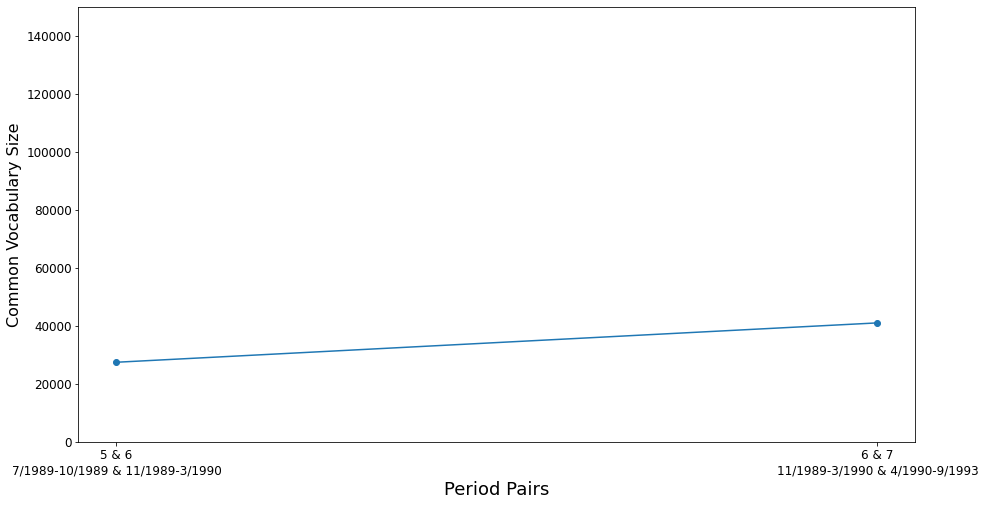

<Figure size 432x288 with 0 Axes>

In [267]:
from matplotlib.font_manager import FontProperties
import random
import matplotlib.pyplot as plt
import seaborn as sns

periods = sorted(PERperiod_df_cleaned.period.to_list())
print(periods)

period_pairs = step_one_pairs(periods)
print(period_pairs)

fig = plt.figure(figsize=(15, 8))
colors = sns.color_palette("hls", 90) #90 is available pairs

plt.rcParams.update({'font.size': 12})

X = common_vocab_cleaned.pair.to_list()
Y = common_vocab_cleaned.common_vocab.to_list()
X = [i+0.5 for i in range(periods[0], periods[-1])]
print(X)
plt.scatter(X,Y)

plt.plot(X,Y)
plt.xticks([i+0.5 for i in range(periods[0], periods[-1])], [
    (str(i)+' & '+str(i+1)+'\n'+periods_to_dates([i,i+1])) for i in range(periods[0], periods[-1])])

plt.xlabel('Period Pairs', fontsize=18)
plt.ylabel('Common Vocabulary Size', fontsize=16)

ax = plt.gca()
ax.set_ylim([0,150000])

handles, labels = ax.get_legend_handles_labels()
plt.savefig('../out_files/common_periodic_vocab_after.png', dpi=200,  bbox_inches='tight')

plt.show()
plt.cla()
plt.clf()
fig.clear()
plt.close(fig)


### Merged periods

In [268]:
df_merged_cleaned = pd.read_csv('../out_files/tell_all_cleaned.csv') #, nrows=200000
df_merged_cleaned = df_merged_cleaned[df_merged_cleaned['speech'].notna()]

print(df_merged_cleaned.tail(2))

                           member_name sitting_date parliamentary_period  \
199998      βενιζελος κυριακου νικητας   03/02/1994             period 8   
199999  καστανιδης γεωργιου χαραλαμπος   03/02/1994             period 8   

       parliamentary_session parliamentary_sitting  \
199998             session 1            sitting 54   
199999             session 1            sitting 54   

                       political_party  \
199998                 πολιτικη ανοιξη   
199999  πανελληνιο σοσιαλιστικο κινημα   

                                          government    member_region  \
199998  ['παπανδρεου ανδρεα(13/10/1993-22/01/1996)']        α' αθηνων   
199999  ['παπανδρεου ανδρεα(13/10/1993-22/01/1996)']  α' θεσσαλονικης   

                                                   roles member_gender  \
199998  ['ε αντιπροεδρος βουλης(22/10/1993-10/08/1996)']          male   
199999                                     ['βουλευτης']          male   

       speaker_info                   

In [269]:
df_merged_cleaned = df_merged_cleaned.rename(columns={'parliamentary_period': 'period'})

df_merged_cleaned.period = df_merged_cleaned.period.apply(lambda x: x.replace(' review 9',''))
df_merged_cleaned.period = df_merged_cleaned.period.apply(lambda x: x.replace('period ',''))

df_merged_cleaned.period = df_merged_cleaned.period.astype(int)

df_merged_cleaned.loc[(df_merged_cleaned.period==5), 'period'] = 7
df_merged_cleaned.loc[(df_merged_cleaned.period==6), 'period'] = 7
df_merged_cleaned.loc[(df_merged_cleaned.period==14), 'period'] = 15
df_merged_cleaned.loc[(df_merged_cleaned.period==16), 'period'] = 17

print(datetime.datetime.now())
#Group speeches by year

PERperiod_df_merged_cleaned = df_merged_cleaned.groupby(df_merged_cleaned.period)['speech'].progress_apply('. '.join).reset_index() #concat sentences, each last sentence for each speech did not have dot so add one.

print(datetime.datetime.now())

  0%|          | 0/2 [00:00<?, ?it/s]

2021-06-21 20:40:15.995553


100%|██████████| 2/2 [00:00<00:00,  2.67it/s]


2021-06-21 20:40:23.181018


In [ ]:
PERperiod_df_merged_cleaned["size_chars"] = PERperiod_df_merged_cleaned.speech.progress_apply(len)
PERperiod_df_merged_cleaned["size_tokens"] = PERperiod_df_merged_cleaned.speech.progress_apply(lambda x: len(nltk.word_tokenize(x)))
PERperiod_df_merged_cleaned["size_unique_tokens"] = PERperiod_df_merged_cleaned.speech.progress_apply(lambda x: len(set(nltk.word_tokenize(x))))
PERperiod_df_merged_cleaned["size_sent"] = PERperiod_df_merged_cleaned.speech.progress_apply(lambda x: len(nltk.sent_tokenize(x)))
PERperiod_df_merged_cleaned["size_unique_sent"] = PERperiod_df_merged_cleaned.speech.progress_apply(lambda x: len(set(nltk.sent_tokenize(x))))


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15, 8))
plt.ticklabel_format(style = 'plain')


periods = PERperiod_df_merged_cleaned.period.to_list()

# plt.plot(PERperiod_df_merged_cleaned.period,PERperiod_df_merged_cleaned.size_chars)
# plt.annotate(text='characters', xy=(periods[-1],PERperiod_df_merged_cleaned.size_chars.to_list()[-1]), size=14)

plt.plot(PERperiod_df_merged_cleaned.period,PERperiod_df_merged_cleaned.size_tokens)
plt.annotate(text='tokens', xy=(periods[-1],PERperiod_df_merged_cleaned.size_tokens.to_list()[-1]), size=14)

plt.plot(PERperiod_df_merged_cleaned.period,PERperiod_df_merged_cleaned.size_unique_tokens)
plt.annotate(text='unique\ntokens', xy=(periods[-1],PERperiod_df_merged_cleaned.size_unique_tokens.to_list()[-1]), size=14)

x_labels = [periods_to_dates(period) for period in periods]    
plt.xticks(periods,x_labels, rotation=40)

ax = plt.gca()
formatter = FuncFormatter(numerize.numerize)
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.legend(['tokens', 'unique tokens'], loc='upper left',prop={'size': 14})

plt.ylabel('Amount')
plt.xlabel('Periods')
plt.gca().set_ylim(bottom=0)
plt.rcParams['axes.labelsize'] = 19

In [ ]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15, 8))
plt.ticklabel_format(style = 'plain')

periods = PERperiod_df_merged_cleaned.period.to_list()

plt.plot(PERperiod_df_merged_cleaned.period,PERperiod_df_merged_cleaned.size_unique_tokens)
plt.annotate(text='unique\ntokens', xy=(periods[-1],PERperiod_df_merged_cleaned.size_unique_tokens.to_list()[-1]), size=14)

# plt.plot(PERperiod_df_merged_cleaned.period,PERperiod_df_merged_cleaned.size_sent)
# plt.annotate(text='sentences', xy=(periods[-1],PERperiod_df_merged_cleaned.size_sent.to_list()[-1]), size=14)

plt.plot(PERperiod_df_merged_cleaned.period,PERperiod_df_merged_cleaned.size_unique_sent)
plt.annotate(text='unique\nsentences', xy=(periods[-1],PERperiod_df_merged_cleaned.size_unique_sent.to_list()[-1]), size=14)

x_labels = [periods_to_dates(period) for period in periods]    
plt.xticks(periods,x_labels, rotation=40)

ax = plt.gca()
formatter = FuncFormatter(numerize.numerize)
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.legend(['unique\ntokens', 'unique\nsentences'], loc='upper left',prop={'size': 14})

plt.ylabel('Amount')
plt.xlabel('Periods')
plt.gca().set_ylim(bottom=0)
plt.rcParams['axes.labelsize'] = 19

### Common vocabulary size per period

In [ ]:
# Sort periods based on number in the string
import re

def step_one_pairs(list_of_items):
    return [(list_of_items[i],list_of_items[i+1]) for i in range(len(list_of_items)-1)]

periods = sorted(PERperiod_df_merged_cleaned.period.to_list())
print(periods)

period_pairs = step_one_pairs(periods)
print(period_pairs)

In [ ]:
PERperiod_df_merged_cleaned['vocab'] = PERperiod_df_merged_cleaned.speech.progress_apply(lambda x: nltk.word_tokenize(x))

In [ ]:
common_vocab_merged_cleaned = []

for pair in period_pairs:
    
    s1 = set(PERperiod_df_merged_cleaned.loc[(PERperiod_df_merged_cleaned.period==pair[0])].vocab.values[0])
    s2 = set(PERperiod_df_merged_cleaned.loc[(PERperiod_df_merged_cleaned.period==pair[1])].vocab.values[0])
    common_voc = len(s1.intersection(s2))
    common_vocab_merged_cleaned.append([pair, common_voc])
    
common_vocab_df_merged_cleaned = pd.DataFrame(common_vocab_merged_cleaned, columns = ['pair', 'common_vocab'])
print(common_vocab_df_merged_cleaned.head(2))

In [ ]:
print(periods)
print(period_pairs)

In [ ]:
from matplotlib.font_manager import FontProperties
import random
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(15, 8))
colors = sns.color_palette("hls", 90) #90 is available pairs

plt.rcParams.update({'font.size': 12})

# X = common_vocab_df_merged_cleaned.pair.to_list()
Y = common_vocab_df_merged_cleaned.common_vocab.to_list()
X = [(pair[0]+pair[1])/2 for pair in period_pairs]

print(X)
print(Y)
plt.scatter(X,Y)

plt.plot(X,Y)
plt.xticks(X, period_pairs)

plt.xlabel('Period Pairs', fontsize=18)
plt.ylabel('Common Vocabulary Size', fontsize=16)
# plt.gca().set_ylim(bottom=0)
# plt.gca().set_ylim([0,150000])
# plt.gca().set_ylim(bottom=0)150000
ax = plt.gca()
ax.set_ylim([0,150000])
handles, labels = ax.get_legend_handles_labels()
plt.savefig('../out_files/common_periodic_vocab_merged_after.png', dpi=200,  bbox_inches='tight')

plt.show()
plt.cla()
plt.clf()
fig.clear()
plt.close(fig)


In [ ]:
import seaborn as sns
# print(PERperiod_df_original.columns)
# print(PERperiod_df_original.head(2))

metrics = ['size_chars', 'size_tokens', 'size_unique_tokens', 'size_sent', 'size_unique_sent']
# boxplot = PERperiod_df_original.boxplot(column=metrics)
# print(type(boxplot))

average_stats_original = []

avg_metrics = [numerize.numerize(PERperiod_df_original[metric].mean()) for metric in metrics]
average_stats_original.append(['before_preprocessing']+avg_metrics)

avg_metrics = [numerize.numerize(PERperiod_df_cleaned[metric].mean()) for metric in metrics]
average_stats_original.append(['after_preprocessing']+avg_metrics)

avg_metrics = [numerize.numerize(PERperiod_df_merged_cleaned[metric].mean()) for metric in metrics]
average_stats_original.append(['after_merging']+avg_metrics)

average_stats_df_original = pd.DataFrame(average_stats_original, columns = ['step'] + metrics)
print(average_stats_df_original)
average_stats_df_original.to_csv('../out_files/avg_stats.csv', index=False)

# Older stats per year

### Common vocabulary size per year

In [7]:
# # in csv date is a string 03/07/1989 	set format="%d/%m/%Y" to convert to yy-mm-dd: 1989-07-03
# PERyear_df = df.copy()
# PERyear_df.sitting_date = pd.to_datetime(PERyear_df.sitting_date, format="%d/%m/%Y")
# PERyear_df['year'] = PERyear_df['sitting_date'].dt.year

# #Group speeches by year
# PERyear_df = PERyear_df.groupby(['year'])['speech'].apply(' '.join).reset_index()

# PERyear_df.speech = PERyear_df.speech.apply(
#     lambda x: nltk.word_tokenize(x.lower()))

# PERyear_df['vocab'] = PERyear_df.speech.apply(lambda x: list(set(x)))
# years = PERyear_df.year.to_list()
# years.sort()

# year_pairs = step_one_pairs(years)

In [8]:
# voc_list = []

# for pair in year_pairs:
#     s1 = set(PERyear_df.loc[(PERyear_df.year==pair[0])].vocab.values[0])
#     s2 = set(PERyear_df.loc[(PERyear_df.year==pair[1])].vocab.values[0])
#     common_voc = len(s1.intersection(s2))
#     voc_list.append([pair, common_voc])
    
# yearly_voc_df = pd.DataFrame(voc_list, columns = ['pair', 'common_vocab'])
# print(yearly_voc_df.head(2))

           pair  common_vocab
0  (1989, 1990)         46387
1  (1990, 1991)         72972


[1989.5, 1990.5, 1991.5, 1992.5, 1993.5, 1994.5, 1996.5, 1997.5, 1998.5, 1999.5, 2000.5, 2001.5, 2002.5, 2003.5, 2004.5, 2005.5, 2006.5, 2007.5, 2008.5, 2009.5, 2010.5, 2011.5, 2012.5, 2013.5, 2014.5, 2015.5, 2016.5, 2017.5, 2018.5, 2019.5]


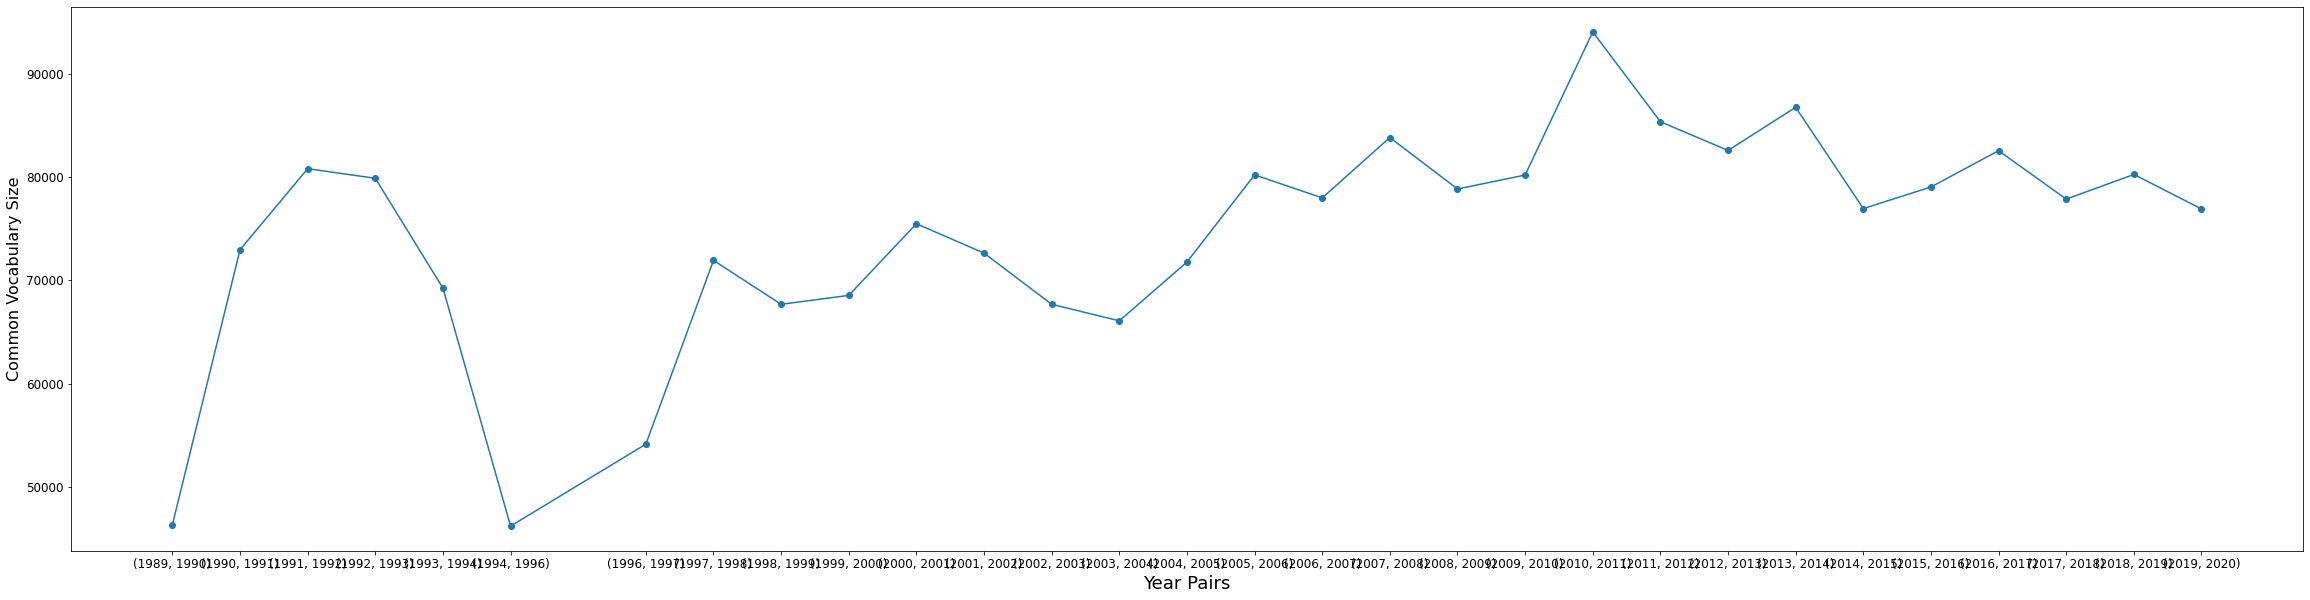

<Figure size 432x288 with 0 Axes>

In [16]:
# from matplotlib.font_manager import FontProperties
# import random
# import matplotlib.pyplot as plt
# import seaborn as sns

# fig = plt.figure(figsize=(40, 10))
# colors = sns.color_palette("hls", 90) #90 is available pairs

# plt.rcParams.update({'font.size': 12})

# X = yearly_voc_df.pair.to_list()
# Y = yearly_voc_df.common_vocab.to_list()
# X = [i[0]+0.5 for i in year_pairs]
# print(X)
# plt.scatter(X,Y)

# plt.plot(X,Y)
# plt.xticks([i[0]+0.5 for i in year_pairs], yearly_voc_df.pair.to_list())

# plt.xlabel('Year Pairs', fontsize=18)
# plt.ylabel('Common Vocabulary Size', fontsize=16)

# ax = plt.gca()
# ax.set_ylim([0,150000])
# # ax.set_ylim([0,150000])

# handles, labels = ax.get_legend_handles_labels()
# plt.savefig('../out_files/common_yearly_vocab.png', dpi=200,  bbox_inches='tight')

# plt.show()
# plt.cla()
# plt.clf()
# fig.clear()
# plt.close(fig)

# #     break




### Vocabulary size per year per party

In [20]:
# PERyear_PERparty_df = df.copy()
# PERyear_PERparty_df.sitting_date = pd.to_datetime(PERyear_PERparty_df.sitting_date, format="%d/%m/%Y")
# PERyear_PERparty_df['year'] = PERyear_PERparty_df['sitting_date'].dt.year

# #Group speeches by year
# PERyear_PERparty_df = PERyear_PERparty_df.groupby(['year', 'political_party'])['speech'].apply(' '.join).reset_index()

# PERyear_PERparty_df.speech = PERyear_PERparty_df.speech.apply(
#     lambda x: nltk.word_tokenize(x.lower()))

# PERyear_PERparty_df['vocab'] = PERyear_PERparty_df.speech.apply(lambda x: list(set(x)))



In [23]:
# years = list(set(PERyear_PERparty_df.year.to_list()))
# years.sort()
# year_pairs = step_one_pairs(years)
# parties = list(set(PERyear_PERparty_df.political_party.to_list()))

# voc_list = []
# for party in parties:
#     for pair in year_pairs:
        
#         if (party in PERyear_PERparty_df.loc[(PERyear_PERparty_df.year==pair[0])].political_party.to_list()
#            ) and (party in PERyear_PERparty_df.loc[(PERyear_PERparty_df.year==pair[1])].political_party.to_list()): 
           
        
#             s1 = set(PERyear_PERparty_df.loc[(PERyear_PERparty_df.year==pair[0]
#                                                  ) & (PERyear_PERparty_df.political_party==party
#                                                      )].vocab.values[0])

#             s2 = set(PERyear_PERparty_df.loc[(PERyear_PERparty_df.year==pair[1]
#                                              ) & (PERyear_PERparty_df.political_party==party
#                                                  )].vocab.values[0])
#         common_voc = len(s1.intersection(s2))
#         voc_list.append([party, pair, common_voc])

# year_party_voc_df = pd.DataFrame(voc_list, columns = ['party','pair', 'common_vocab'])
# print(year_party_voc_df.head(2))

           party          pair  common_vocab
0  αντιπολιτευση  (1989, 1990)             6
1  αντιπολιτευση  (1990, 1991)             3


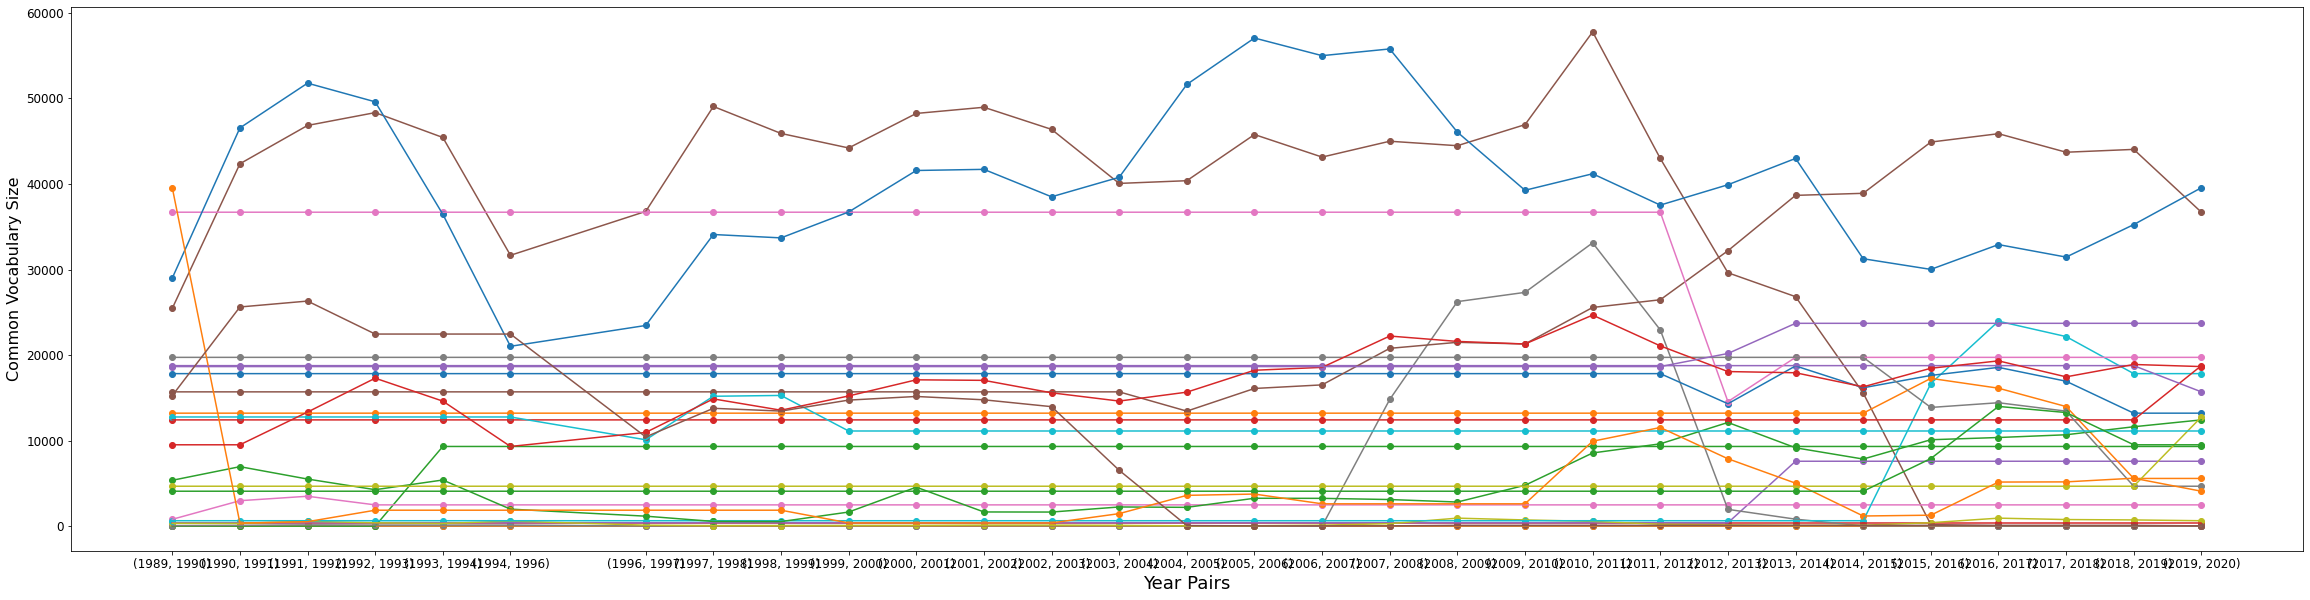

<Figure size 432x288 with 0 Axes>

In [28]:

# fig = plt.figure(figsize=(40, 10))
# colors = sns.color_palette("hls", 90) #90 is available pairs
# plt.rcParams.update({'font.size': 12})


# for party in parties:

#     X = year_party_voc_df.loc[year_party_voc_df.party==party].pair.to_list()
#     Y = year_party_voc_df.loc[year_party_voc_df.party==party].common_vocab.to_list()
#     X = [i[0]+0.5 for i in year_pairs]
# #     print(X)
#     plt.scatter(X,Y)

#     plt.plot(X,Y, label=party)
#     plt.xticks([i[0]+0.5 for i in year_pairs], yearly_voc_df.pair.to_list())

# plt.xlabel('Year Pairs', fontsize=18)
# plt.ylabel('Common Vocabulary Size', fontsize=16)

# ax = plt.gca()
# handles, labels = ax.get_legend_handles_labels()
# plt.savefig('../out_files/common_year_party_vocab.png', dpi=200,  bbox_inches='tight')

# plt.show()
# plt.cla()
# plt.clf()
# fig.clear()
# plt.close(fig)
